In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial"
})
bxwidth = 1

In [2]:
df = pd.read_csv("D:/pml/diabetes_prediction_dataset.csv")

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
print(df.describe())
print(df.info())


                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [6]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
cols = df.columns
print(cols)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [8]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(numeric_cols)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


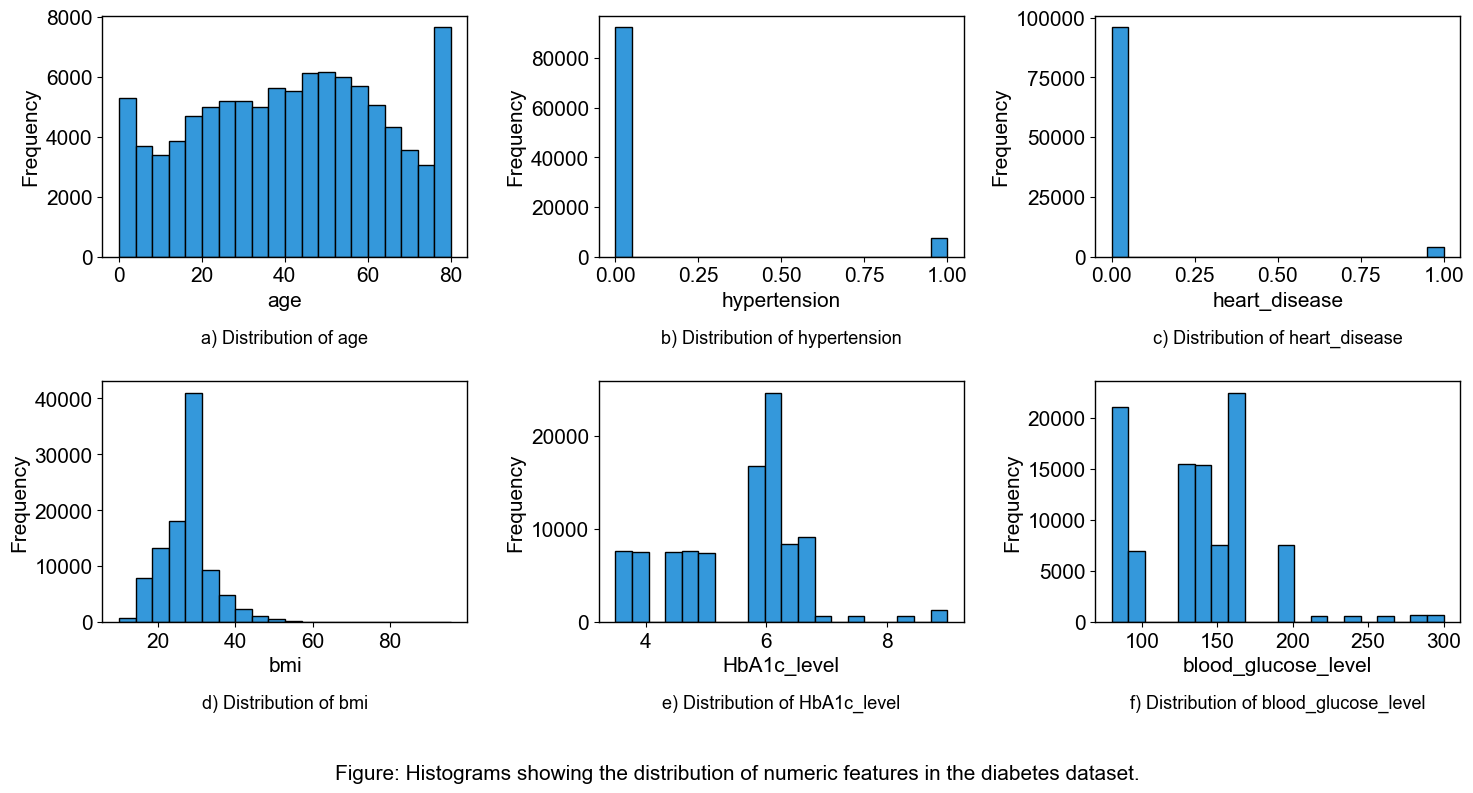

In [9]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
cols = [c for c in numeric_df.columns if c != 'diabetes']
rows = math.ceil(len(cols) / 3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()
subplot_labels = [f"{chr(97+i)})" for i in range(len(cols))]

for i, col in enumerate(cols):
    ax = axes[i]
    ax.hist(numeric_df[col].dropna(), bins=20, edgecolor="black", color="#3498db")
    
    ax.set_title("") 
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
    ax.text(
        0.5, -0.30,
        f"{subplot_labels[i]} Distribution of {col}",
        ha="center",
        va="top",
        transform=ax.transAxes,
        fontsize=13
    )

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(
    0.5, 0.01,
    "Figure: Histograms showing the distribution of numeric features in the diabetes dataset.",
    ha="center",
    fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("histogram_diabetes_features.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

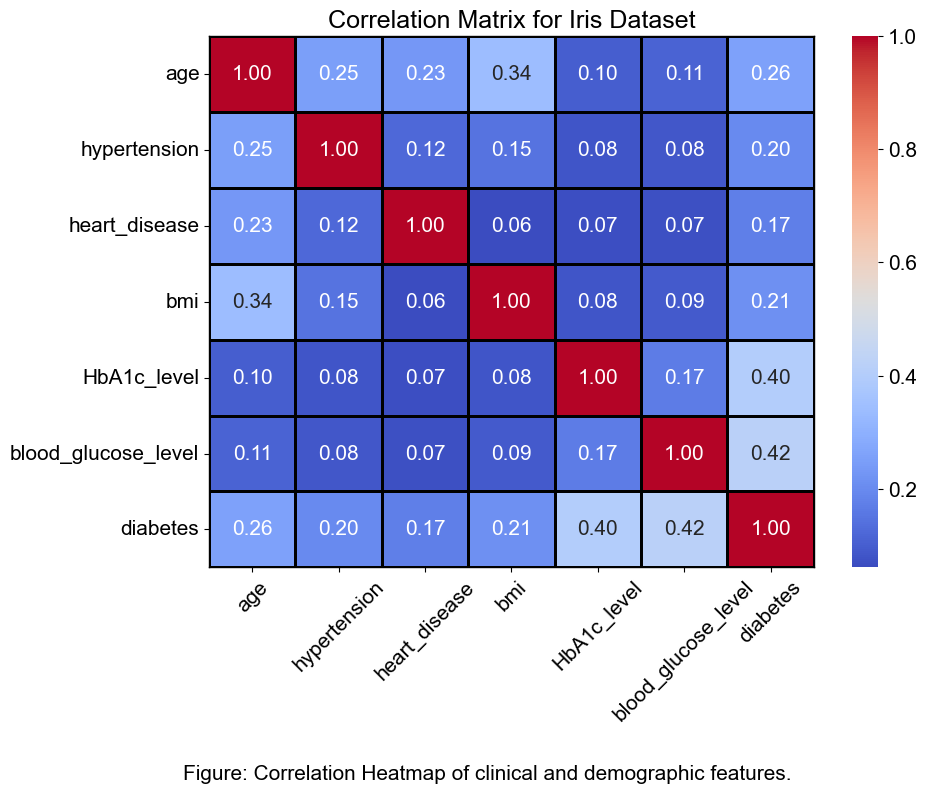

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()

ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor='black')

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(bxwidth)

plt.title("Correlation Matrix for Iris Dataset") 
plt.xticks(rotation=45)

plt.figtext(
    0.5, 0.01, 
    "Figure: Correlation Heatmap of clinical and demographic features.", 
    ha="center", fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("correlation_diabetes_matrix.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

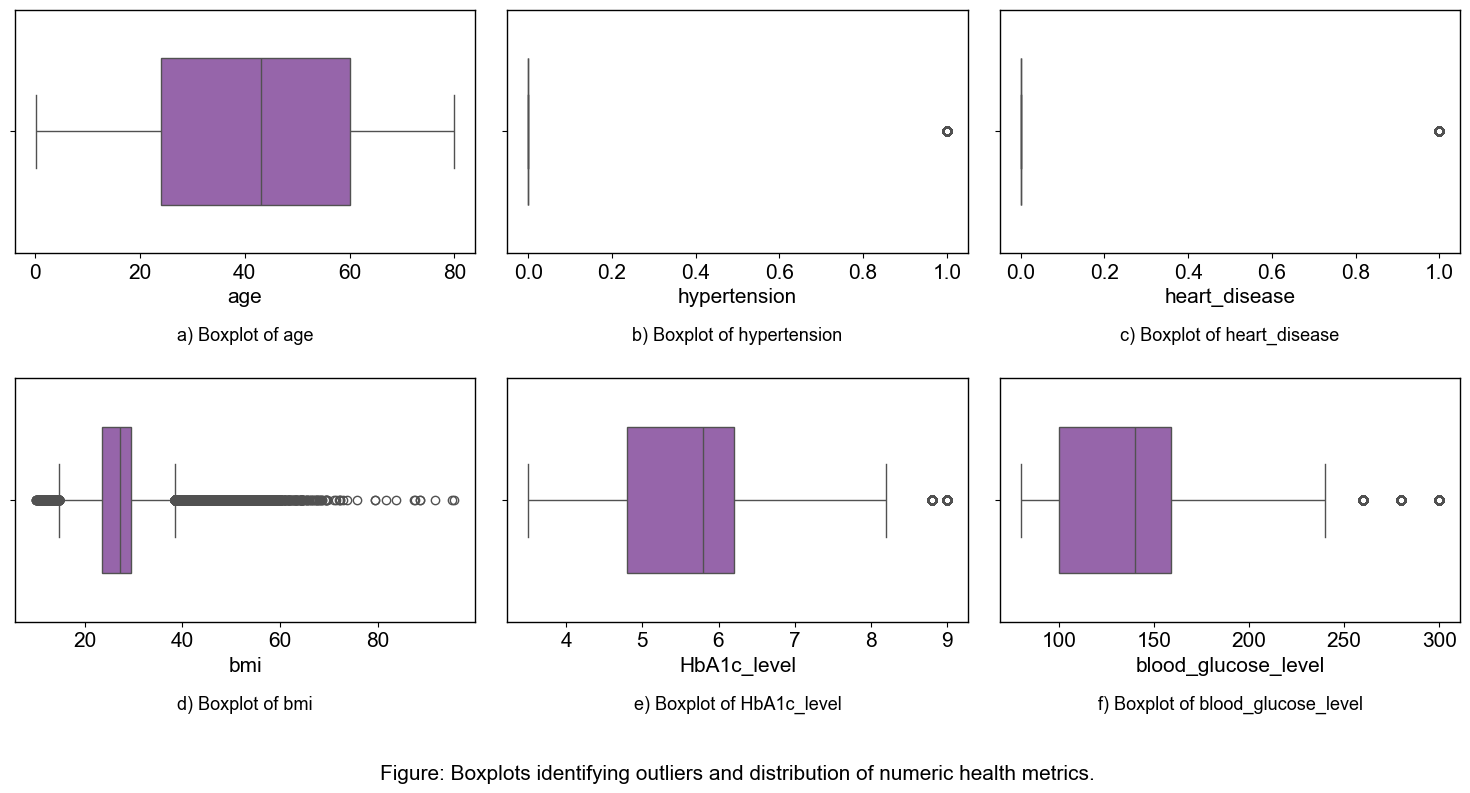

In [11]:
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.boxplot(x=numeric_df[col], ax=ax, color="#9b59b6", width=0.6)
    
    ax.set_title("")
    ax.set_xlabel(col)
    
    ax.text(
        0.5, -0.30, 
        f"{subplot_labels[i]} Boxplot of {col}", 
        ha="center", va="top", transform=ax.transAxes, fontsize=13
    )

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(
    0.5, 0.01, 
    "Figure: Boxplots identifying outliers and distribution of numeric health metrics.", 
    ha="center", fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("boxplot_diabetes_features.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()